# Project 2_Health Insurance cost prediction

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("Health_insurance.csv")

In [3]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [6]:
df.shape

(1338, 7)

In [7]:
print("No.of Rows",df.shape[0])
print("No. of Columns",df.shape[1])

No.of Rows 1338
No. of Columns 7


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [10]:
df.describe() # It will give the statistics of Numerical Columns only

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [11]:
df.describe(include="all") # it will give statistics of numerical and categorica columns both

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


In [12]:
df.describe(include="object") # it will give statistics of object columns

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [13]:
df.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


 Machine learning algorithm only understand the numerical value. So we will convert categorical column into numerical value

#### for sex column

In [14]:
df["sex"].unique()

array(['female', 'male'], dtype=object)

In [15]:
df["sex"]=df["sex"].map({"female":0,"male":1})

In [16]:
df.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.90,0,yes,southwest,16884.9240
1,18,1,33.77,1,no,southeast,1725.5523
2,28,1,33.00,3,no,southeast,4449.4620


#### for smoker column

In [17]:
df["smoker"].unique()

array(['yes', 'no'], dtype=object)

In [18]:
df["smoker"]=df["smoker"].map({"no":0,"yes":1})

In [19]:
df.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.90,0,1,southwest,16884.9240
1,18,1,33.77,1,0,southeast,1725.5523
2,28,1,33.00,3,0,southeast,4449.4620


#### for region column

In [20]:
df["region"].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [21]:
df["region"]=df["region"].map({'southwest':1, 'southeast':2, 'northwest':3, 'northeast':4})

In [22]:
df.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.90,0,1,1,16884.9240
1,18,1,33.77,1,0,2,1725.5523
2,28,1,33.00,3,0,2,4449.4620


### define X and y

In [23]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [24]:
X= df.drop(["charges"],axis=1)
y=df["charges"]

In [25]:
X.head(3)

,age,sex,bmi,children,smoker,region
0,19,0,27.90,0,1,1
1,18,1,33.77,1,0,2
2,28,1,33.00,3,0,2


In [26]:
y.head(3)

0    16884.9240
1     1725.5523
2     4449.4620
Name: charges, dtype: float64

### Train-test split

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [29]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1070, 6), (268, 6), (1070,), (268,))

### Import model

In [30]:
# because our problem is for regressor problem
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

### model training

In [31]:
lr=LinearRegression()
lr.fit(X_train,y_train)

svm=SVR()
svm.fit(X_train,y_train)

rf=RandomForestRegressor()
rf.fit(X_train,y_train)

gr=GradientBoostingRegressor()
gr.fit(X_train,y_train)


GradientBoostingRegressor()

### Prediction on Test data

In [32]:
y_pred1=lr.predict(X_test)
y_pred2=svm.predict(X_test)
y_pred3=rf.predict(X_test)
y_pred4=gr.predict(X_test)

In [33]:
df1=pd.DataFrame({"Actual":y_test,"Lr":y_pred1,"svm":y_pred2,"rf":y_pred3,"gr":y_pred4})

In [34]:
df1

,Actual,Lr,svm,rf,gr
764,9095.06825,8924.407244,9548.261584,11292.807197,11001.128629
887,5272.17580,7116.295018,9492.515425,5312.137480,5840.174656
890,29330.98315,36909.013521,9648.758701,28308.462857,28001.980112
1293,9301.89355,9507.874691,9555.044136,9929.544018,9745.291602
259,33750.29180,27013.350008,9420.421978,34584.477970,33639.100981
...,...,...,...,...,...
109,47055.53210,39116.968669,9648.902852,46983.366795,45431.423211
575,12222.89830,11814.555568,9625.431547,11939.866142,12465.025294
535,6067.12675,7638.107736,9504.168517,6341.221519,6974.336525
543,63770.42801,40959.081722,9605.004594,46740.647482,47862.047791


### compare performance visually

In [35]:
import matplotlib.pyplot as plt

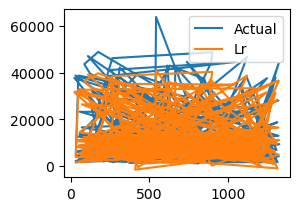

In [37]:
plt.subplot(221) # 2 rows 2 column 1 subplot
plt.plot(df1["Actual"],label="Actual")
plt.plot(df1["Lr"],label="Lr")
plt.legend()

It's difficult to find out the actual and Predicted data because data is huge

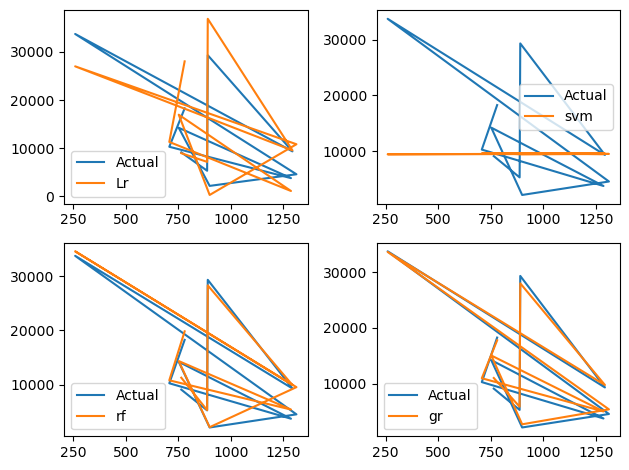

In [46]:
# so, we will use only first 10 rows data

plt.subplot(221)
plt.plot(df1["Actual"].iloc[0:11],label="Actual")
plt.plot(df1["Lr"].iloc[0:11],label="Lr")
plt.legend()

plt.subplot(222)
plt.plot(df1["Actual"].iloc[0:11],label="Actual")
plt.plot(df1["svm"].iloc[0:11],label="svm")
plt.legend()

plt.subplot(223)
plt.plot(df1["Actual"].iloc[0:11],label="Actual")
plt.plot(df1["rf"].iloc[0:11],label="rf")
plt.legend()

plt.subplot(224)
plt.plot(df1["Actual"].iloc[0:11],label="Actual")
plt.plot(df1["gr"].iloc[0:11],label="gr")

plt.tight_layout() # for overcome the overlap in graph
plt.legend()
plt.show()

#### Insights 
model 4 i.e. Gradient regressor perform better

### Evaluating the Algorithm

we will evalute the regressor model by using R square. R square use to measure the goodness of fit.
greater the R square better the regressor model

In [47]:
from sklearn import metrics

In [48]:
score1=metrics.r2_score(y_test,y_pred1)
score2=metrics.r2_score(y_test,y_pred2)
score3=metrics.r2_score(y_test,y_pred3)
score4=metrics.r2_score(y_test,y_pred4)

In [49]:
print(score1,score2,score3,score4)

0.7833463107364538 -0.07229762787861826 0.8669061798722484 0.8779726251291786


#### Insights 
model 4 i.e. Gradient regressor perform better

we will use other metrics like mean absolute error for evaluate the model.
mean absolute error should be minimum

In [50]:

s1=metrics.mean_absolute_error(y_test,y_pred1)
s2=metrics.mean_absolute_error(y_test,y_pred2)
s3=metrics.mean_absolute_error(y_test,y_pred3)
s4=metrics.mean_absolute_error(y_test,y_pred4)

In [51]:
print(s1,s2,s3,s4)

4186.5088983664355 8592.428727899724 2470.7942403122834 2447.951558054584


#### Insights 
model 4 i.e. Gradient regressor perform better

## charges for new customer

In [55]:
X_train.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region'], dtype='object')

In [56]:
data={'age':40,
      'sex': 1,
      'bmi':40.30, 
      'children':4,
      'smoker':1,
      'region':2}
df2=pd.DataFrame(data,index=[0])

In [57]:
df2

,age,sex,bmi,children,smoker,region
0,40,1,40.3,4,1,2


In [58]:
new_pred=gr.predict(df2)
print(new_pred)

[43839.34586293]
